In [1]:
import sys
sys.path.append("../src")

import os
from pathlib import Path
from typing import List, Tuple

# Third-Party Imports
import cv2
import pyvips
import tifffile
import numpy as np
from tqdm import tqdm
from empatches import EMPatches
import matplotlib.pyplot as plt

# Local Imports
from utils import get_args, save_patch_args

/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = os.path.join("..", "..", "data", "patches", "experiment-0", "10336")
img_names = os.listdir(data_dir)

print("num images:", len(img_names))

num images: 10282


In [3]:
def extract_coords(img_name: List[str]):

    stem = Path(img_name).stem
    y1, y2, x1, x2 = [int(c) for c in stem.split("-")[1:]]
    coords = (y1, y2, x1, x2)

    return coords

In [4]:
img_paths = [os.path.join(data_dir, i) for i in img_names]
img_patches = [pyvips.Image.new_from_file(f).numpy() for f in img_paths]

In [5]:
coords = [extract_coords(path) for path in img_paths]

emp = EMPatches()
merged = emp.merge_patches(img_patches, coords).astype(int)

In [6]:
merged.shape

(23744, 21728, 3)

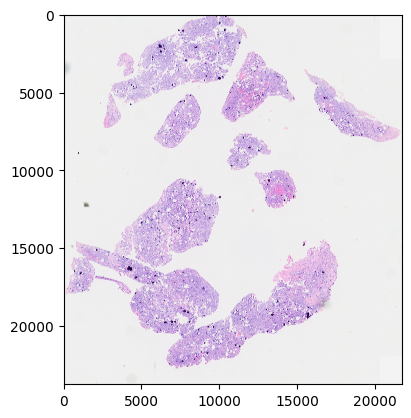

In [7]:
plt.imshow(merged)
plt.show()

In [8]:
plt.imsave("test.png", merged.astype("uint8"))

In [9]:
def merge_patches(patches, coords):
    orig_height = max([c[1] for c in coords])
    orig_width = max([c[3] for c in coords])
    
    num_channels = patches[0].shape[-1]
    merged_img = np.zeros((orig_height, orig_width, num_channels)).astype(np.float32)

    for i, coord in enumerate(coords):
        merged_img[coord[0] : coord[1], coord[2] : coord[3], :] = patches[i]

    return merged_img


In [12]:
coords = [extract_coords(path) for path in img_paths]

merged = merge_patches(img_patches, coords).astype("uint8")

In [13]:
merged.shape

(23744, 21728, 3)

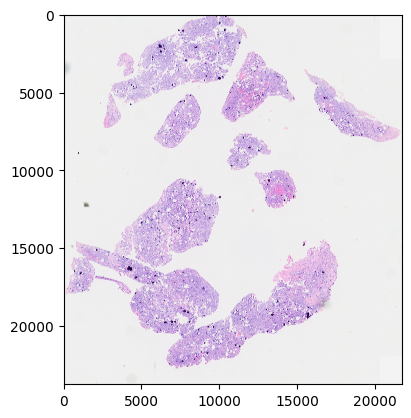

In [14]:
plt.imshow(merged)
plt.show()

In [15]:
plt.imsave("test.png", merged.astype("uint8"))